<a href="https://colab.research.google.com/github/tarnveerSingh/Data_viz-Python/blob/main/Data_Visualization_Task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

#data path
data=pd.read_json("/content/drive/MyDrive/tech_test_3000.json")
data

,webRTCSession,serviceAgent,contact,callEndTime,callStartTime
0,"{'metrics': {'jitter': {'max': 123, 'avg': 13}...","{'interaction': {'totalDurationSec': 1517, 'ta...","{'id': '1f23ae97-3e54-44f7-8f13-711d01540b22',...",2021-08-29T03:03:58.547Z,2021-08-29T02:38:41.547Z
1,"{'metrics': {'jitter': {'max': 131, 'avg': 13}...","{'interaction': {'totalDurationSec': 1295, 'ta...","{'id': '926882ef-490d-4fa5-b79b-05591aac3f49',...",2021-09-12T00:39:30.339Z,2021-09-12T00:17:55.339Z
2,"{'metrics': {'jitter': {'max': 13, 'avg': 3}, ...","{'interaction': {'totalDurationSec': 3450, 'ta...","{'id': '580a1871-aabf-473d-aa0b-51513c56dd68',...",2021-09-04T03:38:51.360Z,2021-09-04T02:41:21.360Z
3,"{'metrics': {'jitter': {'max': 73, 'avg': 2}, ...","{'interaction': {'totalDurationSec': 1731, 'ta...","{'id': '2b7e77e3-3732-4b1c-825d-567a08f3e682',...",2021-08-24T05:59:21.012Z,2021-08-24T05:30:30.012Z
4,"{'metrics': {'jitter': {'max': 46, 'avg': 9}, ...","{'interaction': {'totalDurationSec': 3231, 'ta...","{'id': '1f22f4bd-774f-4edd-89a8-b1dccac32e01',...",2021-08-30T05:15:02.065Z,2021-08-30T04:21:11.065Z
...,...,...,...,...,...
2995,"{'metrics': {'jitter': {'max': 26, 'avg': 6}, ...","{'interaction': {'totalDurationSec': 1635, 'ta...","{'id': '78016331-55ac-4062-8195-c12761f98d98',...",2021-09-02T00:45:19.652Z,2021-09-02T00:18:04.652Z
2996,"{'metrics': {'jitter': {'max': 133, 'avg': 20}...","{'interaction': {'totalDurationSec': 4535, 'ta...","{'id': 'edf8dffa-c68e-4193-8179-25845b1e3b0b',...",2021-09-14T04:04:45.417Z,2021-09-14T02:49:10.417Z
2997,"{'metrics': {'jitter': {'max': 52, 'avg': 13},...","{'interaction': {'totalDurationSec': 1708, 'ta...","{'id': '8c1e3ab7-99a1-458d-80f6-63ab630b4472',...",2021-09-11T02:24:26.868Z,2021-09-11T01:55:58.868Z
2998,"{'metrics': {'jitter': {'max': 70, 'avg': 12},...","{'interaction': {'totalDurationSec': 6212, 'ta...","{'id': '0c6b39d1-781a-419a-880d-10d600a2a528',...",2021-09-13T00:27:50.296Z,2021-09-12T22:44:18.296Z


In [ ]:
len(data.callEndTime.unique())

3000

In [ ]:
#json normalize
agents = pd.json_normalize(data['serviceAgent'])
agents.head(3)
#assigning agents time
agents['callEndTime']=data['callEndTime']
agents['callStartTime']=data['callStartTime']
#assigning a new variable and extracting only these three columns from 2500 rows
agents_processed_2500=agents[['username','callEndTime','callStartTime']].iloc[:2500]
agents_processed_2500.sort_values(by="callStartTime")

,username,callEndTime,callStartTime
1636,Keely.Bernier,2021-08-14T22:18:08.986Z,2021-08-14T20:30:03.986Z
2076,Juliana.Pfeffer,2021-08-14T23:04:06.845Z,2021-08-14T21:10:51.845Z
1294,Lysanne.Kuhic,2021-08-14T22:52:20.079Z,2021-08-14T21:40:58.079Z
2322,Monroe.Parisian,2021-08-14T23:43:48.978Z,2021-08-14T21:46:58.978Z
647,Abe.Will,2021-08-14T22:33:38.884Z,2021-08-14T21:51:49.884Z
...,...,...,...
1166,Rasheed.Boyle,2021-09-14T05:59:56.674Z,2021-09-14T05:30:06.674Z
1564,Crawford.Franecki,2021-09-14T07:09:19.740Z,2021-09-14T05:51:05.740Z
1966,Reva.Grant,2021-09-14T06:19:08.037Z,2021-09-14T05:54:50.037Z
2419,Natasha.Baumbach,2021-09-14T07:17:14.918Z,2021-09-14T06:22:23.918Z


In [ ]:
agents_processed_2500.to_csv("Agent_data_2500.csv")
# print("Agents")
# len(agents_processed_2500.username.unique())

In [ ]:
agents_processed_2500=agents_processed_2500.sort_values(by='callStartTime')
print("types")
agents_processed_2500.dtypes

types


username         object
callEndTime      object
callStartTime    object
dtype: object

In [ ]:
#removing Strings from callStartTime and CallEndTime
agents_processed_2500['callStartTime'] = agents_processed_2500['callStartTime'].str.replace('T',' ')
agents_processed_2500['callStartTime'] = agents_processed_2500['callStartTime'].str.replace('Z','')
agents_processed_2500['callEndTime'] = agents_processed_2500['callEndTime'].str.replace('T',' ')
agents_processed_2500['callEndTime'] = agents_processed_2500['callEndTime'].str.replace('Z','')

In [ ]:
# converting into date and time
agents_processed_2500['callEndTime']=pd.to_datetime(agents_processed_2500['callEndTime'], format='%Y-%m-%d %H:%M:%S')
agents_processed_2500['callEndTime']=pd.to_datetime(agents_processed_2500['callEndTime'], format='%Y-%m-%d %H:%M:%S')
#sorting agents based on callStartTime
agents_processed_2500=agents_processed_2500.sort_values(by="callStartTime")
agents_processed_2500

,username,callEndTime,callStartTime
1636,Keely.Bernier,2021-08-14 22:18:08.986,2021-08-14 20:30:03.986
2076,Juliana.Pfeffer,2021-08-14 23:04:06.845,2021-08-14 21:10:51.845
1294,Lysanne.Kuhic,2021-08-14 22:52:20.079,2021-08-14 21:40:58.079
2322,Monroe.Parisian,2021-08-14 23:43:48.978,2021-08-14 21:46:58.978
647,Abe.Will,2021-08-14 22:33:38.884,2021-08-14 21:51:49.884
...,...,...,...
1166,Rasheed.Boyle,2021-09-14 05:59:56.674,2021-09-14 05:30:06.674
1564,Crawford.Franecki,2021-09-14 07:09:19.740,2021-09-14 05:51:05.740
1966,Reva.Grant,2021-09-14 06:19:08.037,2021-09-14 05:54:50.037
2419,Natasha.Baumbach,2021-09-14 07:17:14.918,2021-09-14 06:22:23.918


In [ ]:
#determing based on input start_datetime and end_datetime
start_datetime=input('Enter Start Date Time (YYYY-MM-DD) & (HH-MM-SS): ')
end_datetime=input('Enter End Date Time (YYYY-MM-DD) & (HH-MM-SS): ')

Enter Start Date Time (YYYY-MM-DD) & (HH-MM-SS): 2021-08-14 20:30
Enter End Date Time (YYYY-MM-DD) & (HH-MM-SS): 2021-08-28 20:30


In [ ]:
#filter data as per input
agents_processed_2500_plot=agents_processed_2500.loc[(agents_processed_2500['callStartTime']>=start_datetime) & 
(agents_processed_2500['callEndTime']<=end_datetime)]
# Sorting agents based on callStartTime
agents_processed_2500=agents_processed_2500.sort_values(by="callStartTime")
#print
agents_processed_2500

,username,callEndTime,callStartTime
1636,Keely.Bernier,2021-08-14 22:18:08.986,2021-08-14 20:30:03.986
2076,Juliana.Pfeffer,2021-08-14 23:04:06.845,2021-08-14 21:10:51.845
1294,Lysanne.Kuhic,2021-08-14 22:52:20.079,2021-08-14 21:40:58.079
2322,Monroe.Parisian,2021-08-14 23:43:48.978,2021-08-14 21:46:58.978
647,Abe.Will,2021-08-14 22:33:38.884,2021-08-14 21:51:49.884
...,...,...,...
1166,Rasheed.Boyle,2021-09-14 05:59:56.674,2021-09-14 05:30:06.674
1564,Crawford.Franecki,2021-09-14 07:09:19.740,2021-09-14 05:51:05.740
1966,Reva.Grant,2021-09-14 06:19:08.037,2021-09-14 05:54:50.037
2419,Natasha.Baumbach,2021-09-14 07:17:14.918,2021-09-14 06:22:23.918


In [ ]:
# getting start and finish Time (Hourly) and assign them as well
agents_processed_2500_plot['start_hour'] = pd.to_datetime(agents_processed_2500_plot['callStartTime']).dt.hour
agents_processed_2500_plot['end_hour'] = pd.to_datetime(agents_processed_2500_plot['callEndTime']).dt.hour
#sorting the value based on start_hour only
agents_processed_2500_plot=agents_processed_2500_plot.sort_values(by="start_hour")
agents_processed_2500_plot

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,username,callEndTime,callStartTime,start_hour,end_hour
2249,Jarred.Upton,2021-08-24 01:32:58.619,2021-08-24 00:04:22.619,0,1
1523,Kory.Roob,2021-08-18 01:39:40.500,2021-08-18 00:45:35.500,0,1
1085,Amalia.Schinner,2021-08-18 02:18:34.706,2021-08-18 00:42:39.706,0,2
1592,Shemar.Conroy,2021-08-18 01:11:25.824,2021-08-18 00:40:02.824,0,1
1034,Danika.Flatley,2021-08-18 01:24:01.727,2021-08-18 00:32:48.727,0,1
...,...,...,...,...,...
166,Baron.Wisozk,2021-08-24 01:16:00.017,2021-08-23 23:54:29.017,23,1
1252,Stevie.Weimann,2021-08-23 01:40:40.093,2021-08-22 23:56:54.093,23,1
2068,Vida.Farrell,2021-08-25 23:50:10.125,2021-08-25 23:16:36.125,23,23
2478,Adele.McCullough,2021-08-26 00:40:46.805,2021-08-25 23:32:05.805,23,0


In [ ]:
# len(agents_processed_2500_plot)

In [ ]:
#extracting unique start and end hours
l1= agents_processed_2500_plot.start_hour.unique() 
l2=agents_processed_2500_plot.end_hour.unique()
#joining them
joinedlist=[*l1, *l2]
#np
print("joined")
joinedlist=np.unique(joinedlist)
joinedlist

joined


array([ 0,  1,  2,  3,  4,  5,  6,  7, 20, 21, 22, 23])

In [ ]:
# naming two list for counting hours and counting agents 
l_hour=[]
l_count=[]
#calculating number of agents for each hour
for i in joinedlist:
    temp=agents_processed_2500_plot.loc[(agents_processed_2500_plot['start_hour']==i) | 
                                      (agents_processed_2500_plot['end_hour']==i)]
    l_hour.append(i)
    l_count.append(len(temp.username.unique()))
    

dataFrame
    Hour  Agent_Count
0      0          176
1      1          179
2      2          186
3      3          201
4      4          188
5      5          201
6      6          165
7      7          109
8     20           39
9     21           83
10    22          191
11    23          174
GRAPH


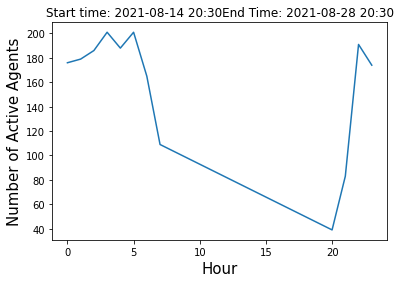

In [ ]:
#zip two listing in df
df = pd.DataFrame(list(zip(l_hour, l_count)),
               columns =['Hour', 'Agent_Count'])
print("dataFrame")
print(df)

print("GRAPH")
plt.plot(df.Hour,df.Agent_Count)
plt.xlabel('Hour',fontsize=15)
plt.ylabel('Number of Active Agents',fontsize=15)
plt.title('Start time: '+str(start_datetime)+"End Time: "+str(end_datetime))
plt.show()

In [ ]:
print("graph using plotly ex")
fig = px.line(df, x="Hour", y="Agent_Count", title='Start time: '+str(start_datetime)+" End Time: "+str(end_datetime))
fig.write_html("Agent_Count_By_Hour.html")
fig.show()

graph using plotly ex


In [ ]:
#2nd Graph
agents_filtered=agents.iloc[:1000]
column_bar=input('Column to Visualize (interaction.totalDurationSec/interaction.talkingDurationSec/interaction.onHoldDurationSec/interaction.onMuteDurationSec): ')
agents_filtered=agents_filtered.sort_values(by=column_bar,ascending=True)
agents_filtered=agents_filtered.iloc[:35]
fig = px.bar(agents_filtered, x='username', y=column_bar, title='35 Agents based on least seconds spent on the call values of column: '+column_bar)
fig.write_html("Metrics Visualization for different Agents Session.html")
fig.show()

Column to Visualize (interaction.totalDurationSec/interaction.talkingDurationSec/interaction.onHoldDurationSec/interaction.onMuteDurationSec): interaction.talkingDurationSec
